In [ ]:
# importing necessary packages
import os
import pandas as pd # importing pandas
import numpy as np # imperting numpy
import matplotlib.pyplot as plt # importing matplotlib
import seaborn as sns # importing seaborn

file = "student-scores.csv" # file name
if os.path.exists(file):
    df = pd.read_csv(file) # reading file using pandas . read_csv method
else:
    print("File is unavailable")
df.head(5) # output first 5 rows in the dataframe

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


Query 1: How do weekly self study hours affect students scores across different subjects

In [ ]:
df.info() # getting info about the datatset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [3]:
df.isnull().sum() # checking for null values

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [ ]:
df.duplicated().sum() # checking for duplicated values in the dataset

np.int64(0)

Changing the first letters of the data in the gender column to uppercase for standardization purposes

In [5]:
df["gender"] = df["gender"].apply(lambda x: x.title()) # standardizing values in the gender column to match other object columns
df.head(5)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,Male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,Female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,Female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,Female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,Male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [ ]:
between1_10 = [0,1,2,3,4,5,6,7,8,9,10] # grouping study hours 1-10h
between11_20 = [11,12,13,14,15,16,17,18,19,20] # grouping study hours 11-20h
between21_30 = [21,22,23,24,25,26,27,28,29,30] # grouping study hours 21-30h
between31_40 = [31,32,33,34,35,36,37,38,39,40] # grouping study hours 31-40h
between41_50 = [41,42,43,44,45,46,47,48,49,50] # grouping study hours 41-50h
#checking if the groups i had created are located in the weekly_self_study_hours column
conditions = [df["weekly_self_study_hours"].isin(between1_10),
                df["weekly_self_study_hours"].isin(between11_20),
                df["weekly_self_study_hours"].isin(between21_30),
                df["weekly_self_study_hours"].isin(between31_40),
                df["weekly_self_study_hours"].isin(between41_50)]

labels = ["1-10h","11h-20h","21-30h","31-40h","41-50h"] # labels for the categories
df["grouping_hours"] = np.select(conditions, labels , default="Other")#using numpy to create an array and assigning it to a new column called grouping_hours that takes arguments: conditions and labels
df.head(5)# output of my dataframe

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,Male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,21-30h
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,Female,False,2,False,47,Doctor,90,86,96,100,90,88,90,41-50h
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,Female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,11h-20h
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,Female,False,5,False,3,Artist,71,74,88,80,89,63,86,1-10h
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,Male,False,5,False,10,Unknown,84,77,65,65,80,74,76,1-10h


In [ ]:
df["grouping_hours"] = df["grouping_hours"].astype("category") # changing the grouping_hours to a categorical columm i'e the datatype from string to category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          2000 non-null   int64   
 1   first_name                  2000 non-null   object  
 2   last_name                   2000 non-null   object  
 3   email                       2000 non-null   object  
 4   gender                      2000 non-null   object  
 5   part_time_job               2000 non-null   bool    
 6   absence_days                2000 non-null   int64   
 7   extracurricular_activities  2000 non-null   bool    
 8   weekly_self_study_hours     2000 non-null   int64   
 9   career_aspiration           2000 non-null   object  
 10  math_score                  2000 non-null   int64   
 11  history_score               2000 non-null   int64   
 12  physics_score               2000 non-null   int64   
 13  chemistry_score   

In [ ]:
labels = ["1-10h","11h-20h","21-30h","31-40h","41-50h"] # labels for my category
grouping = df.groupby("grouping_hours", observed=False).agg({
                'math_score':['mean',"std","min"],
                'history_score':['mean',"std","min"],
                'physics_score':['mean',"std","min"],
                "chemistry_score":['mean',"std","min"],
                "biology_score":['mean',"std","min"],
                "english_score":['mean',"std","min"],
                "geography_score":['mean',"std","min"]
                })
def round_to_significant_figures(x):
    return round(x)

# Applying the function to the mean values
# Applying the function to the mean values
grouping_mean_rounded = grouping.map(lambda x: round(x) if isinstance(x, float) else x)

grouping_mean_rounded.index = pd.CategoricalIndex(grouping_mean_rounded.index, categories=labels, ordered=True)# using pdc.CtegoricalINdex to enforce(index) order in my categorical column when performing summary statistics
# Sort by index
grouping_mean_rounded.sort_index()

math_score         history_score         physics_score          \
                     mean std min          mean std min          mean std min   
grouping_hours                                                                  
1-10h                  76  16  40            76  14  50            79  14  50   
11h-20h                86  10  60            80  12  60            81  12  60   
21-30h                 87  10  60            82  11  60            82  12  60   
31-40h                 89   8  60            85  11  60            85  11  60   
41-50h                 92   5  85            92   5  85            93   4  85   

               chemistry_score  ...     biology_score         english_score  \
                          mean  ... min          mean std min          mean   
grouping_hours                  ...                                           
1-10h                       78  ...  50            77  13  50            77   
11h-20h                     79  ...  60            78  14  30            82   
21-30h                      81  ...  60            80  14  30            82   
31-40h                      83  ...  60            84  13  34            85   
41-50h                      93  ...  85            93   5  85            91   

                       geography_score          
               std min            mean std min  
grouping_hours                                  
1-10h           13  50              80  12  60  
11h-20h         11  60              80  12  60  
21-30h          11  60              80  12  60  
31-40h          11  60              84  11  60  
41-50h           4  85              93   5  85  

[5 rows x 21 columns]

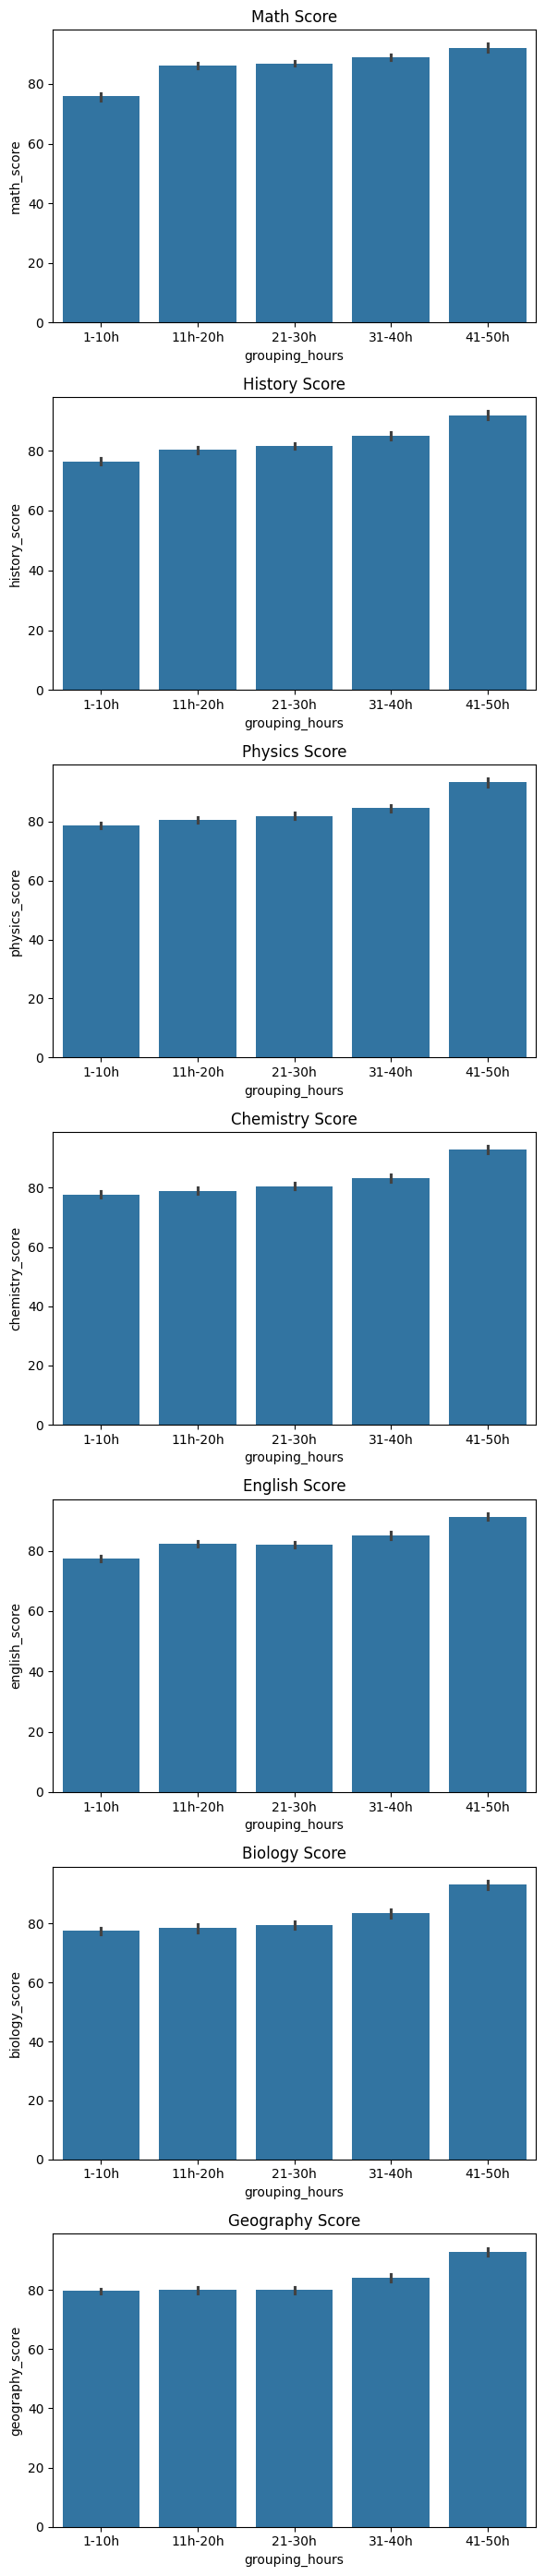

In [ ]:
# Create a figure with multiple subplots arranged vertically
fig , axes = plt.subplots(nrows=7, ncols=1, figsize=(6, 28))  # 7 rows, 1 column

# List of subjects to loop through
subjects = ["math_score", "history_score", "physics_score", 
            "chemistry_score", "english_score", "biology_score", "geography_score"]

# Looping through subjects and create a barplot for each
for ax, subject in zip(axes, subjects):
    sns.barplot(data=df, x="grouping_hours", y=subject, ax=ax)
    ax.set_title(subject.replace("_", " ").title())  # Format title nicely

plt.tight_layout()  # Adjusting layout for spacing
plt.show()


In [12]:
# Calculate the correlation matrix for the students scores
corr_columns = ["weekly_self_study_hours","math_score","history_score","physics_score","chemistry_score","biology_score","english_score","geography_score"]
corr_matrix = df[corr_columns].corr()
corr_matrix


,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
weekly_self_study_hours,1.000000,0.393569,0.276231,0.202120,0.201340,0.190481,0.247796,0.153622
math_score,0.393569,1.000000,0.147247,0.115719,0.127131,0.081298,0.134831,0.049672
history_score,0.276231,0.147247,1.000000,0.048478,0.121498,0.088502,0.147193,0.065751
physics_score,0.202120,0.115719,0.048478,1.000000,0.126163,0.132280,0.054314,0.103126
chemistry_score,0.201340,0.127131,0.121498,0.126163,1.000000,0.119992,0.068341,0.065430
biology_score,0.190481,0.081298,0.088502,0.132280,0.119992,1.000000,0.074227,0.106526
english_score,0.247796,0.134831,0.147193,0.054314,0.068341,0.074227,1.000000,0.072250
geography_score,0.153622,0.049672,0.065751,0.103126,0.065430,0.106526,0.072250,1.000000


<Axes: >

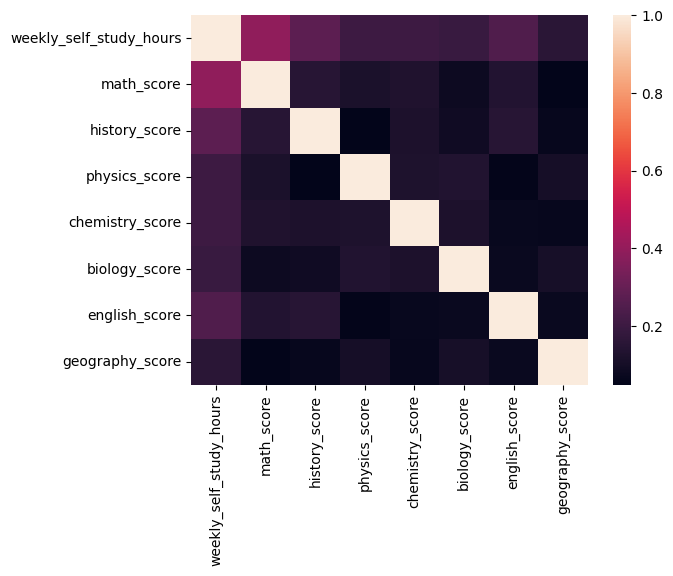

In [ ]:
sns.heatmap(data=corr_matrix) # heatmap to plot the correlation matrix

Answer to question 1 :

From my queries, i can infer that weekly study hours do have an effect on scores acrosss different subjects.

1. Mean : The avaerge score for each subject accorrding to the grouped_hours, i discovered that the average score increased as the study hours increased with students studying for 40-50 hours having the highest average scores across all the subjects.
2. Min : The minimium scores increased after for those who studied for 1-10 hours. However it remained constant for most subjects. Afterwards, there's an incrase in the minimium score for those who studied for 41-50 hours.
3. Correlation matrix: Most of the subjects had a correlation matrix between 0 -0.3 indicating a weak correlation across study hours in relation to the subject. This calculation shows a weak information that weekly study hours do affect scores across subject i.e as study hours increased, the scores across different subjects are affected in someway.
4. Barplots : The trend in my charts also indicate a postive trend i.e scores incrases with higher study hours.
In general, study hours do affect student scores.

2. Do students with part-time jobs perform differently compared to those without jobs?

In [ ]:
df.head() # reading dataframe

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,Male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,21-30h
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,Female,False,2,False,47,Doctor,90,86,96,100,90,88,90,41-50h
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,Female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,11h-20h
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,Female,False,5,False,3,Artist,71,74,88,80,89,63,86,1-10h
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,Male,False,5,False,10,Unknown,84,77,65,65,80,74,76,1-10h


In [ ]:
# calculating the min scores across all subjects and grouping on the part_time_job
minpart_time_jobs = df.groupby("part_time_job")[["math_score","history_score","physics_score","chemistry_score","biology_score","english_score","geography_score"]].min().round(0)
minpart_time_jobs

,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
part_time_job,,,,,,,
False,40,50,50,50,30,50,60
True,40,50,50,50,35,50,60


In [ ]:
# calculating the modal scores across all subjects and grouping on the part_time_job
modepart_time_job = df.groupby("part_time_job")[["math_score","history_score","physics_score","chemistry_score","biology_score","english_score","geography_score"]].apply(lambda x: x.mode().iloc[0])
modepart_time_job

,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
part_time_job,,,,,,,
False,99.0,88.0,96.0,96.0,100.0,90.0,88.0
True,94.0,90.0,92.0,61.0,100.0,87.0,60.0


In [ ]:
# calculating the mean scores across all subjects and grouping on the part_time_job
mean_parttime_jobs = df.groupby("part_time_job")[["math_score","history_score","physics_score","chemistry_score","biology_score","english_score","geography_score"]].mean().round(0)
mean_parttime_jobs

,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
part_time_job,,,,,,,
False,85.0,81.0,82.0,80.0,80.0,82.0,81.0
True,78.0,77.0,78.0,77.0,79.0,79.0,80.0


In [ ]:
import scipy.stats as stat
# calulating t-test to check if there's a signigicant difference in the means of the independent groups by performing an independent t test on math_scores
group1 = df[df["part_time_job"] == True]["history_score"]
group2 = df[df["part_time_job"] == False]["history_score"]

#t statistic and p_value on the two independent groups
t_stat, p_value = stat.ttest_ind(group1, group2, equal_var=False)

# Printing with 2 significant figures
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.7f}")

T-statistic: -4.492, P-value: 0.0000092


In [ ]:
import scipy.stats as stat
# calulating t-test to check if there's a signigicant difference in the means of the independent groups by performing an independent t test on history_scores
group3 = df[df["part_time_job"] == True]["math_score"]
group4 = df[df["part_time_job"]== False]["math_score"]

#t statistic and p_value on the two independent groups
t_stat,p_value = stat.ttest_ind(group3,group4, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.7f}")

T-statistic: -6.723, P-value: 0.0000000


In [ ]:
# calulating t-test to check if there's a signigicant difference in the means of the independent groups by performing an independent t test on physics_scores
group5 = df[df["part_time_job"] == True]["physics_score"]
group6 = df[df["part_time_job"]== False]["physics_score"]
#t statistic and p_value on the two independent groups
t_stat,p_value = stat.ttest_ind(group5,group6, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.7f}")

T-statistic: -5.102, P-value: 0.0000005


In [ ]:
# calulating t-test to check if there's a signigicant difference in the means of the independent groups by performing an independent t test on chemistry_scores
group7 = df[df["part_time_job"] == True]["chemistry_score"]
group8 = df[df["part_time_job"]== False]["chemistry_score"]
#t statistic and p_value on the two independent groups
t_stat,p_value = stat.ttest_ind(group7,group8, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.7f}")

T-statistic: -3.809, P-value: 0.0001602


In [ ]:
# calulating t-test to check if there's a signigicant difference in the means of the independent groups by performing an independent t test on biology_scores
group9 = df[df["part_time_job"] == True]["biology_score"]
group10 = df[df["part_time_job"]== False]["biology_score"]
#t statistic and p_value on the two independent groups
t_stat,p_value = stat.ttest_ind(group9,group10, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.7f}")

T-statistic: -0.178, P-value: 0.8584415


In [ ]:
# calulating t-test to check if there's a signigicant difference in the means of the independent groups by performing an independent t test on english_scores
group11 = df[df["part_time_job"] == True]["english_score"]
group12 = df[df["part_time_job"]== False]["english_score"]
#t statistic and p_value on the two independent groups
t_stat,p_value = stat.ttest_ind(group11,group12, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.7f}")

T-statistic: -4.138, P-value: 0.0000424


In [ ]:
# calulating t-test to check if there's a signigicant difference in the means of the independent groups by performing an independent t test on geogrphy_scores
group13 = df[df["part_time_job"] == True]["geography_score"]
group14 = df[df["part_time_job"]== False]["geography_score"]

t_stat,p_value = stat.ttest_ind(group13,group14, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.7f}")

T-statistic: -1.319, P-value: 0.1877995


Query 2 answer:


INFERENCE FROM MY QUERIES
1. Mode:  The modal scores in students without jobs are higher than those with jobs in most subjects.
2. Mean : Just like the modal score infered, students without jobs had better jobs than students with jobs
3. Independent t-test: My test showed that in most subjects their p_value was less than 0.05 indicating that the change in score for people with or without jobs is significant and didn't occur by chance . Although, there's is an exception for geogrphy and biology with p_values greater than 0.05. However, this indicates an abnormality maybe most students loved those subjects or the exam questions weren't so though and students answered with ease. hence there may be no need to study for long hours.
In conclusion, i can say part time jobs do affect student scores across several subjects.


3. Is there a relationship between absence days and lower academic performance?

In [ ]:
df.head() # reading the dataframe using pd.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,Male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,21-30h
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,Female,False,2,False,47,Doctor,90,86,96,100,90,88,90,41-50h
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,Female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,11h-20h
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,Female,False,5,False,3,Artist,71,74,88,80,89,63,86,1-10h
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,Male,False,5,False,10,Unknown,84,77,65,65,80,74,76,1-10h


In [ ]:
#Performing a grouping on the first_name and last_name then using transform("sum") to create a new column where each value represents the sum of its group.
#.sum() then sums all the values in this column assigning it to a new column total_score_per_student
df["total_score_per_student"] = df.groupby(["first_name","last_name"])[["math_score","history_score","physics_score","chemistry_score","biology_score","english_score","geography_score"]].transform("sum").sum(axis=1)
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,Male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,21-30h,574
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,Female,False,2,False,47,Doctor,90,86,96,100,90,88,90,41-50h,640
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,Female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,11h-20h,605
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,Female,False,5,False,3,Artist,71,74,88,80,89,63,86,1-10h,551
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,Male,False,5,False,10,Unknown,84,77,65,65,80,74,76,1-10h,521


In [ ]:
df.loc[df["absence_days"] == df["absence_days"].max()]# locating the rows having the max number of absence_Days

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student
13,14,Pamela,Jackson,pamela.jackson.14@gslingacademy.com,Female,False,10,False,2,Business Owner,66,94,86,100,57,90,63,1-10h,556
69,70,Raymond,Shea,raymond.shea.70@gslingacademy.com,Male,False,10,True,22,Banker,99,81,96,69,91,87,83,21-30h,606
72,73,Louis,Edwards,louis.edwards.73@gslingacademy.com,Male,True,10,False,1,Business Owner,61,70,69,64,59,78,80,1-10h,481
151,152,Stephen,Rodriguez,stephen.rodriguez.152@gslingacademy.com,Male,True,10,False,2,Business Owner,41,57,97,56,50,98,83,1-10h,482
174,175,Amanda,Murphy,amanda.murphy.175@gslingacademy.com,Female,False,10,True,3,Business Owner,65,100,80,83,57,81,81,1-10h,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,1888,Catherine,Coffey,catherine.coffey.1888@gslingacademy.com,Female,False,10,False,2,Business Owner,41,59,69,70,100,65,72,1-10h,476
1912,1913,Bethany,Thomas,bethany.thomas.1913@gslingacademy.com,Female,True,10,False,3,Business Owner,55,92,59,78,61,83,60,1-10h,488
1958,1959,Dennis,Richardson,dennis.richardson.1959@gslingacademy.com,Male,True,10,True,3,Game Developer,88,71,99,74,76,97,87,1-10h,592
1977,1978,Kristin,Garcia,kristin.garcia.1978@gslingacademy.com,Female,False,10,True,5,Business Owner,56,66,87,64,95,89,76,1-10h,533


In [ ]:
df.loc[df["absence_days"] == df["absence_days"].min()]# locating the rows having the min number of absence_Days

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student
27,28,Peter,Gibbs,peter.gibbs.28@gslingacademy.com,Male,False,0,False,23,Writer,64,75,93,79,81,96,85,21-30h,573
30,31,Angie,Miller,angie.miller.31@gslingacademy.com,Female,False,0,False,14,Software Engineer,88,69,87,100,88,85,72,11h-20h,589
47,48,Billy,Soto,billy.soto.48@gslingacademy.com,Male,False,0,True,28,Stock Investor,81,98,74,70,97,65,65,21-30h,550
49,50,Sonia,Noble,sonia.noble.50@gslingacademy.com,Female,False,0,False,14,Accountant,100,89,90,93,30,83,74,11h-20h,559
90,91,Patrick,Parker,patrick.parker.91@gslingacademy.com,Male,False,0,False,14,Accountant,95,78,95,73,32,65,68,11h-20h,506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,1936,Elizabeth,Adams,elizabeth.adams.1936@gslingacademy.com,Female,True,0,False,15,Software Engineer,100,95,72,77,66,68,76,11h-20h,554
1946,1947,Melissa,Finley,melissa.finley.1947@gslingacademy.com,Female,False,0,True,30,Unknown,80,77,96,64,93,62,86,21-30h,558
1949,1950,Pamela,Smith,pamela.smith.1950@gslingacademy.com,Female,False,0,True,19,Banker,83,70,72,65,63,88,94,11h-20h,535
1982,1983,Debra,Gilbert,debra.gilbert.1983@gslingacademy.com,Female,False,0,False,8,Teacher,83,91,69,74,98,86,76,1-10h,577


In [ ]:
df.groupby("absence_days",observed=False)["total_score_per_student"].mean().round(0) # grouping on absence_dyas and suming on the total_Score_per student column

absence_days
0     595.0
1     595.0
2     588.0
3     609.0
4     582.0
5     604.0
6     561.0
7     572.0
8     574.0
9     574.0
10    543.0
Name: total_score_per_student, dtype: float64

In [ ]:
df[["total_score_per_student", "absence_days"]].describe()# describing the nature of dataset

,total_score_per_student,absence_days
count,2000.00000,2000.000000
mean,588.44950,3.665500
std,129.53824,2.629271
min,414.00000,0.000000
25%,542.00000,2.000000
50%,569.00000,3.000000
75%,598.00000,5.000000
max,1797.00000,10.000000


In [ ]:

bins = [0, 2, 4, 6,8,10]  # (0-2], (2-5], (5-10]
# Apply pd.cut to group data across several categories using bins increasing by 2
df["absence_category"] = pd.cut(df["absence_days"], bins=bins)
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student,absence_category
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,Male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,21-30h,574,"(2, 4]"
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,Female,False,2,False,47,Doctor,90,86,96,100,90,88,90,41-50h,640,"(0, 2]"
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,Female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,11h-20h,605,"(8, 10]"
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,Female,False,5,False,3,Artist,71,74,88,80,89,63,86,1-10h,551,"(4, 6]"
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,Male,False,5,False,10,Unknown,84,77,65,65,80,74,76,1-10h,521,"(4, 6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,Male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82,21-30h,558,"(0, 2]"
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,Male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73,11h-20h,534,"(0, 2]"
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,Female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78,11h-20h,578,"(4, 6]"
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,Female,True,10,True,5,Business Owner,51,96,72,89,95,88,75,1-10h,566,"(8, 10]"


In [ ]:
#perfroming summary statistics on the absence_days columns and performin max and mean on the total_score_per_student category
df.groupby("absence_category",observed=False).agg(
    mean=("total_score_per_student","mean"),
    max=("total_score_per_student","max")
)

,mean,max
absence_category,,
"(0, 2]",591.515328,1797
"(2, 4]",598.828037,1737
"(4, 6]",586.240964,1711
"(6, 8]",572.723757,1737
"(8, 10]",554.763889,1156


In [ ]:
#correlation matrix on absence_days vs total_score_per_student
corrcolumns = ["absence_days","total_score_per_student"]
correlation = df[corrcolumns].corr()
correlation# getting the ouptu of correlation

,absence_days,total_score_per_student
absence_days,1.00000,-0.08594
total_score_per_student,-0.08594,1.00000


<Axes: >

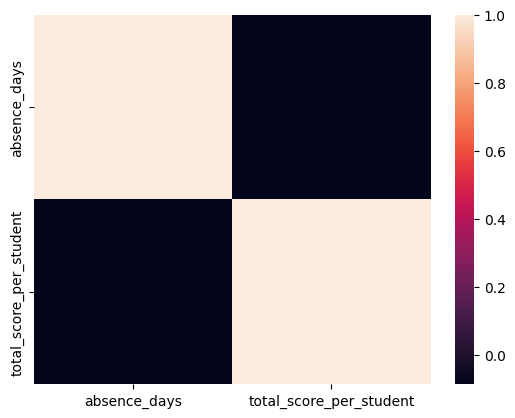

In [ ]:
sns.heatmap(data=correlation) # heatmap to represent our correlation using seaborn

In [ ]:
df.groupby(["first_name","last_name","absence_days"])["total_score_per_student"].max().sort_values(ascending=False) # identifying the student with the maximiun score and the absecnce days

first_name  last_name  absence_days
Elizabeth   Smith      0               1797
                       2               1797
                       1               1797
Jessica     Smith      1               1737
                       8               1737
                                       ... 
Steven      Alvarez    2                443
Deborah     Rojas      3                442
Alicia      Beltran    6                430
Jennifer    Leblanc    6                414
Thomas      Scott      6                414
Name: total_score_per_student, Length: 1994, dtype: int64

Query 3 answer:

In [40]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student,absence_category
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,Male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,21-30h,574,"(2, 4]"
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,Female,False,2,False,47,Doctor,90,86,96,100,90,88,90,41-50h,640,"(0, 2]"
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,Female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,11h-20h,605,"(8, 10]"
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,Female,False,5,False,3,Artist,71,74,88,80,89,63,86,1-10h,551,"(4, 6]"
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,Male,False,5,False,10,Unknown,84,77,65,65,80,74,76,1-10h,521,"(4, 6]"


In [41]:
counting = [
            len(df[df["extracurricular_activities"]==True]),
            len(df[df["extracurricular_activities"]==False])
]
counting

[408, 1592]

In [42]:
df.loc[(df["total_score_per_student"] == df["total_score_per_student"].max())]

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student,absence_category
631,632,Elizabeth,Smith,elizabeth.smith.632@gslingacademy.com,Female,False,2,True,4,Artist,83,89,99,100,73,86,88,1-10h,1797,"(0.0, 2.0]"
893,894,Elizabeth,Smith,elizabeth.smith.894@gslingacademy.com,Female,False,1,False,13,Banker,82,87,98,73,74,89,66,11h-20h,1797,"(0.0, 2.0]"
1307,1308,Elizabeth,Smith,elizabeth.smith.1308@gslingacademy.com,Female,False,0,False,29,Lawyer,100,92,67,89,90,83,89,21-30h,1797,NaN


In [43]:
df.loc[(df["extracurricular_activities"]==True) & (df["total_score_per_student"].max())].sort_values(by="total_score_per_student", ascending=False).head(10)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student,absence_category
631,632,Elizabeth,Smith,elizabeth.smith.632@gslingacademy.com,Female,False,2,True,4,Artist,83,89,99,100,73,86,88,1-10h,1797,"(0, 2]"
1780,1781,Jessica,Smith,jessica.smith.1781@gslingacademy.com,Female,True,8,True,0,Business Owner,92,78,78,85,94,94,73,1-10h,1737,"(6, 8]"
752,753,Eric,Jones,eric.jones.753@gslingacademy.com,Male,False,5,True,2,Artist,100,67,98,71,92,79,99,1-10h,1180,"(4, 6]"
6,7,Anthony,Smith,anthony.smith.7@gslingacademy.com,Male,False,3,True,23,Software Engineer,99,96,97,73,88,76,64,21-30h,1157,"(2, 4]"
1188,1189,Jessica,Williams,jessica.williams.1189@gslingacademy.com,Female,False,9,True,6,Real Estate Developer,91,94,75,86,84,67,97,1-10h,1156,"(8, 10]"
892,893,Andrew,Smith,andrew.smith.893@gslingacademy.com,Male,False,2,True,24,Software Engineer,85,74,68,68,75,78,95,21-30h,1151,"(0, 2]"
1166,1167,Thomas,Hernandez,thomas.hernandez.1167@gslingacademy.com,Male,False,5,True,3,Game Developer,94,65,100,77,66,96,68,1-10h,1112,"(4, 6]"
826,827,Thomas,Hernandez,thomas.hernandez.827@gslingacademy.com,Male,False,1,True,9,Unknown,66,65,82,96,87,87,63,1-10h,1112,"(0, 2]"
770,771,Cheryl,Gutierrez,cheryl.gutierrez.771@gslingacademy.com,Female,True,5,True,1,Business Owner,40,51,93,100,76,60,99,1-10h,1104,"(4, 6]"
1562,1563,Brian,Adams,brian.adams.1563@gslingacademy.com,Male,False,5,True,3,Business Owner,56,67,87,97,88,57,86,1-10h,1103,"(4, 6]"


In [44]:
df.loc[(df["extracurricular_activities"]==False) & (df["total_score_per_student"].max())].sort_values(by="total_score_per_student", ascending=False).head(10)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student,absence_category
893,894,Elizabeth,Smith,elizabeth.smith.894@gslingacademy.com,Female,False,1,False,13,Banker,82,87,98,73,74,89,66,11h-20h,1797,"(0.0, 2.0]"
1307,1308,Elizabeth,Smith,elizabeth.smith.1308@gslingacademy.com,Female,False,0,False,29,Lawyer,100,92,67,89,90,83,89,21-30h,1797,NaN
1215,1216,Jessica,Smith,jessica.smith.1216@gslingacademy.com,Female,False,3,False,33,Unknown,88,75,83,74,76,72,61,31-40h,1737,"(2.0, 4.0]"
1268,1269,Jessica,Smith,jessica.smith.1269@gslingacademy.com,Female,False,1,False,24,Lawyer,88,100,89,87,76,89,85,21-30h,1737,"(0.0, 2.0]"
860,861,Michael,Anderson,michael.anderson.861@gslingacademy.com,Male,False,4,False,25,Software Engineer,100,62,78,74,72,73,78,21-30h,1711,"(2.0, 4.0]"
1047,1048,Michael,Anderson,michael.anderson.1048@gslingacademy.com,Male,True,3,False,7,Government Officer,87,86,73,88,98,71,85,1-10h,1711,"(2.0, 4.0]"
1441,1442,Michael,Anderson,michael.anderson.1442@gslingacademy.com,Male,False,6,False,31,Software Engineer,87,96,79,79,74,86,85,31-40h,1711,"(4.0, 6.0]"
1616,1617,Justin,Brooks,justin.brooks.1617@gslingacademy.com,Male,False,3,False,47,Doctor,90,86,98,97,99,96,85,41-50h,1248,"(2.0, 4.0]"
1229,1230,Justin,Brooks,justin.brooks.1230@gslingacademy.com,Male,False,7,False,3,Unknown,93,74,98,100,62,83,87,1-10h,1248,"(6.0, 8.0]"
829,830,Christopher,Jenkins,christopher.jenkins.830@gslingacademy.com,Male,False,5,False,3,Designer,76,77,99,87,95,94,85,1-10h,1194,"(4.0, 6.0]"


In [45]:
mode_scores = df.loc[df["extracurricular_activities"] == False, "total_score_per_student"].mode().iloc[0]
print(mode_scores)
df.loc[(df["extracurricular_activities"] == False) & (df["total_score_per_student"] == mode_scores)].head(5)

557


,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student,absence_category
421,422,Sandra,Jacobs,sandra.jacobs.422@gslingacademy.com,Female,False,1,False,3,Designer,91,62,75,60,82,91,96,1-10h,557,"(0, 2]"
465,466,Clayton,Green,clayton.green.466@gslingacademy.com,Male,False,1,False,31,Software Engineer,88,88,90,67,77,83,64,31-40h,557,"(0, 2]"
491,492,Michael,Clark,michael.clark.492@gslingacademy.com,Male,False,5,False,2,Artist,85,63,83,83,69,94,80,1-10h,557,"(4, 6]"
503,504,Kendra,Robertson,kendra.robertson.504@gslingacademy.com,Female,False,4,False,32,Software Engineer,86,99,77,61,72,92,70,31-40h,557,"(2, 4]"
681,682,Curtis,Duffy,curtis.duffy.682@gslingacademy.com,Male,False,3,False,33,Software Engineer,96,64,100,87,88,60,62,31-40h,557,"(2, 4]"


In [46]:
mode_score = df.loc[df["extracurricular_activities"] == True, "total_score_per_student"].mode().iloc[0]
print(mode_score)
df.loc[(df["extracurricular_activities"] == True) & (df["total_score_per_student"] == mode_score)]

574


,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,grouping_hours,total_score_per_student,absence_category
7,8,George,Short,george.short.8@gslingacademy.com,Male,True,2,True,34,Software Engineer,95,95,82,63,84,70,85,31-40h,574,"(0, 2]"
129,130,Michael,Miller,michael.miller.130@gslingacademy.com,Male,False,6,True,27,Unknown,99,97,64,90,87,68,69,21-30h,574,"(4, 6]"
227,228,Angela,Thomas,angela.thomas.228@gslingacademy.com,Female,False,7,True,17,Software Engineer,91,78,72,69,77,91,96,11h-20h,574,"(6, 8]"
342,343,Wayne,Lane,wayne.lane.343@gslingacademy.com,Male,False,8,True,32,Lawyer,96,95,61,72,71,83,96,31-40h,574,"(6, 8]"
408,409,Evan,Holmes,evan.holmes.409@gslingacademy.com,Male,False,4,True,23,Software Engineer,100,77,75,74,80,94,74,21-30h,574,"(2, 4]"
641,642,Bethany,French,bethany.french.642@gslingacademy.com,Female,False,2,True,6,Unknown,99,77,88,60,93,61,96,1-10h,574,"(0, 2]"
804,805,Maria,Mercer,maria.mercer.805@gslingacademy.com,Female,False,3,True,27,Software Engineer,94,94,86,62,73,90,75,21-30h,574,"(2, 4]"
1251,1252,Terri,Lyons,terri.lyons.1252@gslingacademy.com,Female,False,3,True,21,Writer,69,77,82,93,92,90,71,21-30h,574,"(2, 4]"
1263,1264,Amanda,Edwards,amanda.edwards.1264@gslingacademy.com,Female,False,3,True,27,Unknown,76,72,97,65,87,93,84,21-30h,574,"(2, 4]"
1264,1265,Emily,Waters,emily.waters.1265@gslingacademy.com,Female,True,4,True,24,Stock Investor,86,68,98,87,61,78,96,21-30h,574,"(2, 4]"


<Axes: xlabel='extracurricular_activities', ylabel='total_score_per_student'>

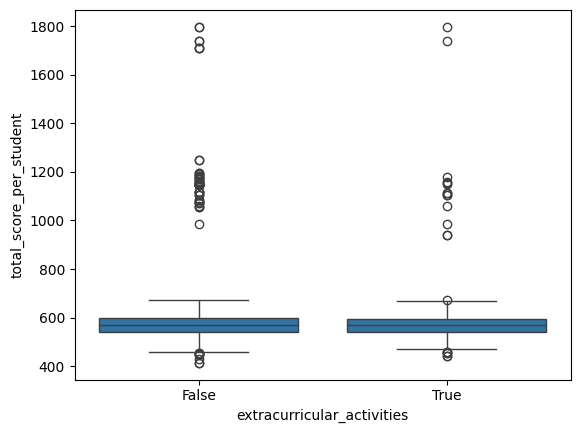

In [47]:
sns.boxplot(data=df, x="extracurricular_activities", y="total_score_per_student")

In [48]:
corrr = ["extracurricular_activities","total_score_per_student"]
correlatingcolumns = df[corrr].corr()
correlatingcolumns

,extracurricular_activities,total_score_per_student
extracurricular_activities,1.000000,-0.009355
total_score_per_student,-0.009355,1.000000


Answer to query 4:


5. Which subject has the strongest correlation with the overall academic success

In [ ]:
corr_columns = ["total_score_per_student","math_score","history_score","physics_score","chemistry_score","biology_score","english_score","geography_score"]
corr_matrix = df[corr_columns].corr()
corr_matrix

,total_score_per_student,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
total_score_per_student,1.000000,0.176075,0.141051,0.150068,0.216652,0.164859,0.138019,0.121061
math_score,0.176075,1.000000,0.147247,0.115719,0.127131,0.081298,0.134831,0.049672
history_score,0.141051,0.147247,1.000000,0.048478,0.121498,0.088502,0.147193,0.065751
physics_score,0.150068,0.115719,0.048478,1.000000,0.126163,0.132280,0.054314,0.103126
chemistry_score,0.216652,0.127131,0.121498,0.126163,1.000000,0.119992,0.068341,0.065430
biology_score,0.164859,0.081298,0.088502,0.132280,0.119992,1.000000,0.074227,0.106526
english_score,0.138019,0.134831,0.147193,0.054314,0.068341,0.074227,1.000000,0.072250
geography_score,0.121061,0.049672,0.065751,0.103126,0.065430,0.106526,0.072250,1.000000
